# Assessing the Impact of Daylight Savings Time on Driving Fatalities

- Anastasiades, Andrew
- Drozdzewicz, Peter
- Garcia, Viera
- Sperry, Taylor
- Surapanemi, Sindhura

### DEPENDENCIES

In [1]:
import pandas as pd #data manipulation
import os #Interoperability
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import datetime as dt

### FILE PATHS

In [23]:
accident_csv = os.path.join("Resources", "2019.csv")

### LOAD DATAFRAME

In [24]:
## We inspected the original CSV and chose the columns we believed were pertinent
columns_to_keep = ['STATENAME', 'DAY', 'MONTH','YEAR','HOUR','DAY_WEEK','DAY_WEEKNAME', 'LGT_CONDNAME',
                   'DRUNK_DR', 'WEATHERNAME', 'RUR_URBNAME', 'FATALS',]
df = pd.read_csv(accident_csv, usecols=columns_to_keep)

### CLEAN DATAFRAME

In [25]:
# EXCLUDE DRUNK DRIVERS #Why do we do this?
df = df[df["DRUNK_DR"]==0] 
df.drop(axis=1, labels=["DRUNK_DR"], inplace=True)

# ADD DATE AND WEEKNUM
# We do this so we can compare week to week changes
df["DATE"] = pd.to_datetime(df[["YEAR", "MONTH", "DAY"]])
#df["WEEK_NUM"] = df["DATE"].dt.week
df['WEEK_NUM'] = df['DATE'].apply(lambda x: (x + dt.timedelta(days=1)).week)

# SPLIT SAMPLE AND CONTROL
control_states = ["Arizona", "Hawaii"] #These states do not observe DLS
control_df = df[df.loc[:,'STATENAME'].isin(control_states)] #NO DLS
sample_df = df[~df.loc[:,'STATENAME'].isin(control_states)] #DLS

control_df


,STATENAME,DAY,MONTH,YEAR,DAY_WEEK,DAY_WEEKNAME,HOUR,RUR_URBNAME,LGT_CONDNAME,WEATHERNAME,FATALS,DATE,WEEK_NUM
918,Arizona,3,1,2019,5,Thursday,1,Urban,Dark - Not Lighted,Clear,1,2019-01-03,1
919,Arizona,3,1,2019,5,Thursday,2,Urban,Dark - Not Lighted,Clear,1,2019-01-03,1
920,Arizona,3,1,2019,5,Thursday,18,Urban,Dark - Not Lighted,Clear,1,2019-01-03,1
921,Arizona,4,1,2019,6,Friday,2,Rural,Dark - Not Lighted,Cloudy,1,2019-01-04,1
922,Arizona,4,1,2019,6,Friday,21,Urban,Dark - Not Lighted,Clear,1,2019-01-04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,Hawaii,31,12,2019,3,Tuesday,20,Urban,Dark - Not Lighted,Clear,1,2019-12-31,1
10956,Hawaii,14,11,2019,5,Thursday,9,Urban,Daylight,Clear,1,2019-11-14,46
10957,Hawaii,17,12,2019,3,Tuesday,21,Rural,Dark - Unknown Lighting,Rain,1,2019-12-17,51
10958,Hawaii,23,11,2019,7,Saturday,0,Urban,Dark - Not Lighted,Clear,3,2019-11-23,47


### DISTRIBUTION OF WEEK-OVER-WEEK CHANGE IN FATALITIES

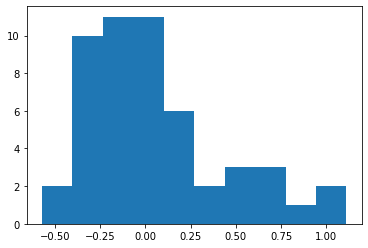

In [29]:
week_gb = control_df.groupby(by=["WEEK_NUM"])
week_control = pd.DataFrame(week_gb["FATALS"].sum())
#week_summary["WEEKLY_CHANGE"]
weekly_change = []
for index, row in week_control.iterrows(): # WE WANT DELTA! FOR EACH WEEK
    if index==1:
        weekly_change.append(np.nan)
    else:
        this_num = week_control.loc[index, "FATALS"] # FATALITIES FROM THIS WEEK
        last_num = week_control.loc[index-1, "FATALS"] # FATALITIES FROM LAST WEEK
        delta = (this_num / last_num) - 1
        weekly_change.append(delta)
week_control["WEEKLY_CHANGE"] = weekly_change
week_control["Z_SCORE"] = st.zscore(weekly_change, nan_policy='omit')
week_control.reset_index(inplace=True)
plt.hist(week_control["WEEKLY_CHANGE"])
plt.show()

In [30]:
week_control

,WEEK_NUM,FATALS,WEEKLY_CHANGE,Z_SCORE
0,1,13,NaN,NaN
1,2,16,0.230769,0.466219
2,3,16,0.000000,-0.149961
3,4,16,0.000000,-0.149961
4,5,13,-0.187500,-0.650608
5,6,13,0.000000,-0.149961
6,7,12,-0.076923,-0.355355
7,8,24,1.000000,2.520154
8,9,15,-0.375000,-1.151255
9,10,16,0.066667,0.028046


### Graphing with DAY_WEEKNAME

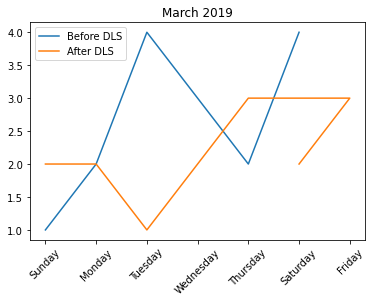

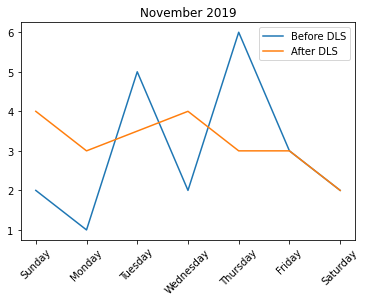

In [32]:
#MARCH 2019 - The switch occurs March 10
week_before = dt.date(2019,3,10).isocalendar()[1] #Determine week of year
week_after = week_before + 1

control_gb = control_df.groupby(by=["DATE","WEEK_NUM", "DAY_WEEKNAME"])
control = pd.DataFrame(control_gb["FATALS"].sum())
control.reset_index(inplace=True)
before = control[control["WEEK_NUM"]==week_before]
after = control[control["WEEK_NUM"]==week_after]
plt.plot(before["DAY_WEEKNAME"], before["FATALS"], label="Before DLS")
plt.plot(after["DAY_WEEKNAME"], after["FATALS"], label="After DLS")
plt.xticks(rotation = 45)
plt.legend()
plt.title("March 2019")
plt.show()

#NOVEMBER 2019 - The switch occurs November 3
week_before = dt.date(2019,11,3).isocalendar()[1] #Determine week of year (starting on Monday)
week_after = week_before + 1

control_gb = control_df.groupby(by=["DATE","WEEK_NUM", "DAY_WEEKNAME"])
control = pd.DataFrame(control_gb["FATALS"].sum())
control.reset_index(inplace=True)
before = control[control["WEEK_NUM"]==week_before]
after = control[control["WEEK_NUM"]==week_after]

plt.plot(before["DAY_WEEKNAME"], before["FATALS"], label="Before DLS")
plt.plot(after["DAY_WEEKNAME"], after["FATALS"], label="After DLS")
plt.xticks(rotation = 45)
plt.legend()
plt.title("November 2019")
plt.show()